In [ ]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from dateutil import parser
import logging

import velidb.btcommon as bt
#import velibt.velidb as vdb
from velidb.tobcache import tob_cache

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

source = ['BTMU_HC_1', 'EBS_ULTRA_NY_A', 'EBS_LIVE_NY_XML_A']
currency = ['USDJPY']

# currency = ['EURUSD', 'GBPUSD', 'USDJPY', 'USDHCHF', 'EURCHF', 'AUDUSD', 'USDCAD', 'NZDUSD', 'USDMZN', 'EURSEK',
#             'USDHKD', 'USDZAR', 'EURNOK', 'EURCZK', 'EURDKK', 'EURHUF', 'USDCNH', 'EURPLN']

class BTMUAnalysis(object):
    def __init__(self, start, end, days):
        self.start = start
        self.end   = end
        self.days  = days
        self.dfs   = {}  # initilize the dictionary. E.g., 'BTMU_HC_1':data frame

    def loading_data(self):
        for s in source:
            for c in currency:
                newDF = pd.DataFrame()
                for d in range(0, self.days):
                    #cac = tob_cache('/home/jsong/notebooks/BTMU/tob_cache', logger)
                    cac = tob_cache('/home/jsong/Documents/tob_cache', logger)
                    start = self.start + dt.timedelta(d)
                    tmp = cac.getData(bt.asset_class.FX, s, c, start)
                    newDF = newDF.append(tmp, ignore_index=False)
                self.dfs[s] = newDF
                    
    def to_dataframe(self, data):
        out = []
        tmptime = 0
        for x in data.iterrows():
            temp = x
            if x["timestamp"] == tmptime:
                x["timestamp"] = x["timestamp"] + 1
                out.append([x["timestamp"], x["bid"], x["bid_size"], x["offer"], x["offer_size"]])
                tmptime = x["timestamp"]
            else:
                out.append([x["timestamp"], x["bid"], x["bid_size"], x["offer"], x["offer_size"]])
                tmptime = x["timestamp"]
        out = pd.DataFrame(out)
        out.columns = ['timestamp', 'bid', 'bid_size', 'offer', 'offer_size']

        ind = np.array( out['timestamp'].duplicated() )
        while any(ind):
            #Note: here 9 is a hard coding activity. len(str(x)) does not work
            out['timestamp'][ind] = out['timestamp'][ind].map(lambda x: x + 1 )
            ind = np.array( out['timestamp'].duplicated() )

        return(out)

    def do_analysis(self):
        print("all the analysis will go here")
        occs = 10
        statis = 100
        return (occs, statis)


# execution here
def run_model(start, end, days):
    mod = BTMUAnalysis(start, end, days)
    mod.loading_data()

    # v1 = mod.dfs['BTMU_HC_1']
    # v2 = mod.dfs['EBS_ULTRA_NY_A']
    # v3 = mod.dfs['EBS_LIVE_NY_XML_A']
    # plt.plot(v1.timestamp, v1.bid)
    # plt.plot(v2.timestamp, v2.bid)
    # plt.plot(v3.timestamp, v3.bid)
    # #plt.xlim([0,100])
    # plt.show()
    # 
    # plt.plot(v1.timestamp, v1.offer)
    # plt.plot(v2.timestamp, v2.offer)
    # plt.plot(v3.timestamp, v3.offer)
    # #plt.xlim([0,100])
    # plt.show()
        
    #occurrence, statis = mod.do_analysis();
    #return (occurrence, statis)
    
    return mod # for debugging only


days  = 5   # for now, we only look at a week's data
start = dt.datetime(2016, 10, 10)
end = start + dt.timedelta(days - 1)

mod = run_model(start, end, days)

print ("not done")

done


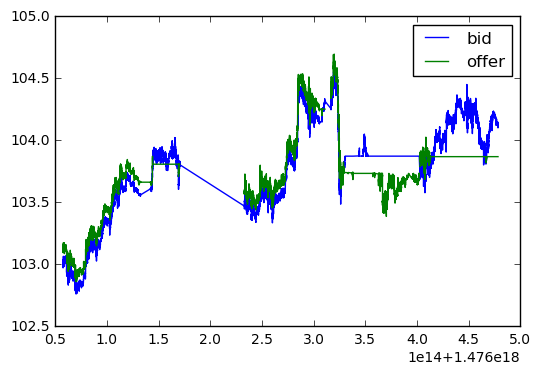

                                  bid   bid_size    offer  offer_size  \
timestamp                                                               
2016-10-10 00:00:00.130437888     NaN        NaN  103.103   3000000.0   
2016-10-10 00:00:00.132128000     NaN        NaN  103.103   1000000.0   
2016-10-10 00:00:00.358792960  102.98  1000000.0  103.103   1000000.0   
2016-10-10 00:00:00.358792960  102.98  1000000.0  103.103   3000000.0   
2016-10-10 00:00:00.360752128  102.98  1000000.0  103.109   3000000.0   

                                  timestamp  
timestamp                                    
2016-10-10 00:00:00.130437888  1.476058e+18  
2016-10-10 00:00:00.132128000  1.476058e+18  
2016-10-10 00:00:00.358792960  1.476058e+18  
2016-10-10 00:00:00.358792960  1.476058e+18  
2016-10-10 00:00:00.360752128  1.476058e+18  


In [122]:
v1 = mod.dfs['BTMU_HC_1']
plt.plot(v1.timestamp, v1.bid)
plt.plot(v1.timestamp, v1.offer)
plt.legend(loc='best')
plt.title("BTMU_HC_1")
plt.xlabel("Timestamps")
plt.ylabel("Price")
#plt.xlim([0,100])
plt.show()
pd.options.display.max_rows = 200
print (v1.head())

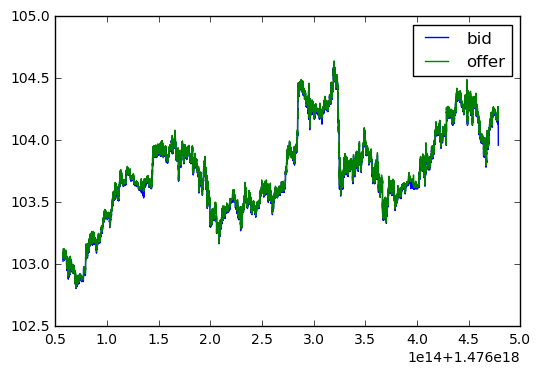

                                   bid   bid_size   offer  offer_size  \
timestamp                                                               
2016-10-10 00:00:00.003451904  103.025  3000000.0     NaN         NaN   
2016-10-10 00:00:00.003451904  103.025  3000000.0  103.06   4000000.0   
2016-10-10 00:00:00.022936064  103.030  1000000.0  103.06   4000000.0   
2016-10-10 00:00:00.048541952  103.030  2000000.0  103.06   4000000.0   
2016-10-10 00:00:00.048541952  103.030  2000000.0  103.05   2000000.0   

                                  timestamp  
timestamp                                    
2016-10-10 00:00:00.003451904  1.476058e+18  
2016-10-10 00:00:00.003451904  1.476058e+18  
2016-10-10 00:00:00.022936064  1.476058e+18  
2016-10-10 00:00:00.048541952  1.476058e+18  
2016-10-10 00:00:00.048541952  1.476058e+18  


In [120]:
v2 = mod.dfs['EBS_ULTRA_NY_A']
plt.plot(v2.timestamp, v2.bid)
plt.plot(v2.timestamp, v2.offer)
plt.legend(loc='best')
#plt.xlim([0,100])
plt.show()
pd.options.display.max_rows = 200
print (v2.head())

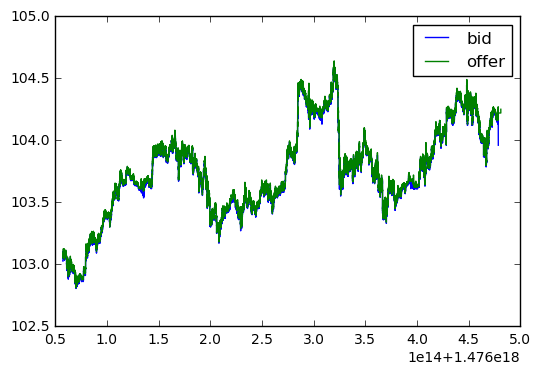

                                   bid   bid_size   offer  offer_size  \
timestamp                                                               
2016-10-10 00:00:00.010178048  103.025  3000000.0     NaN         NaN   
2016-10-10 00:00:00.010178048  103.025  3000000.0  103.06   4000000.0   
2016-10-10 00:00:00.131587072  103.025  4000000.0  103.06   4000000.0   
2016-10-10 00:00:00.131587072  103.035  2000000.0  103.06   4000000.0   
2016-10-10 00:00:00.131587072  103.035  2000000.0  103.06   3000000.0   

                                  timestamp  
timestamp                                    
2016-10-10 00:00:00.010178048  1.476058e+18  
2016-10-10 00:00:00.010178048  1.476058e+18  
2016-10-10 00:00:00.131587072  1.476058e+18  
2016-10-10 00:00:00.131587072  1.476058e+18  
2016-10-10 00:00:00.131587072  1.476058e+18  


In [121]:
v3 = mod.dfs['EBS_LIVE_NY_XML_A']
plt.plot(v3.timestamp, v3.bid)
plt.plot(v3.timestamp, v3.offer)
plt.legend(loc='best')
#plt.xlim([0,100])
plt.show()
pd.options.display.max_rows = 200
print (v3.head())